- Reference: https://ithelp.ithome.com.tw/articles/10241789

In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 使用from_tensorflow_slices 建立tf dataset

- datatype: tensor
- 使用for 逐筆提取
- iterator/Next: 每次取一個

In [3]:
dataset = tf.data.Dataset.from_tensor_slices([8,3,0,8,2,1])

dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [9]:
for ele in dataset:
    print(ele)
    
print()  
print("Iterator")
print()
## iterator
it = iter(dataset)

# 一次取一筆

print(next(it).numpy())
print(next(it).numpy())

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)

Iterator

8
3


### Map

- function 轉換:搭配lambda

In [11]:
gfg = tf.data.Dataset.from_tensor_slices([1,2,3,4,5])

for elem in gfg.map(lambda x:x*2):
    print(elem.numpy())

2
4
6
8
10


### Filter

- 篩選, 僅保留符合條件的

In [14]:
tf.data.Dataset.from_tensor_slices([1,2,3,4,5])

rules = lambda x:x%2==0

for elem in gfg.filter(rules):
    print(elem.numpy())

2
4


### from_generator

- 結合python generator功能

- repeat()：取完會重頭再開始
- batch(10)：一次取 10 個
- take(5)：取 5 次

In [17]:
def count(stop):
    i = 0
    while i<stop:
        yield i
        i += 1
        
# args=[25] ： 最多從 count 函數取25個 

df_counter = tf.data.Dataset.from_generator(count,args = [25],output_types = tf.int32,output_shapes = (),)

# repeat()：取完會重頭再開始
# batch(10)：一次取 10 個
# take(5)：取 5 次

for count_batch in df_counter.repeat().batch(10).take(5):
    print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


### Shuffle

- 抽過的不會再被抽到
- 建議設定為等於資料大小


In [20]:
for count_batch in df_counter.shuffle(20).batch(10).take(5):
    
    print(count_batch.numpy())

[ 8 14  5 20  0 10 23 11  3 19]
[ 1  9  7 24 16 21 12 22 18 13]
[ 2 15  4  6 17]


### 從網址取得壓縮檔，解壓縮，並作資料增補後，讀取影像。

- tf.keras.utils.get_file：從網址取得壓縮檔，untar=True：解壓縮
- ImageDataGenerator：讀取影像，可同時作特徵縮放、資料增補(Data Augmentation)

Found 3670 images belonging to 5 classes.


array([0., 0., 0., 1., 0.], dtype=float32)

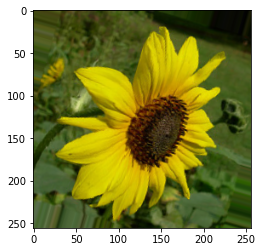

In [22]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

## rescale, rotation >> data augmentation

img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,rotation_range = 20)

images,labels = next(img_gen.flow_from_directory(flowers))

import matplotlib.pyplot as plt
plt.imshow(images[0])
labels[0]

In [23]:
### 從directory 取得image

## args 為flow_from_directory的input value

ds = tf.data.Dataset.from_generator(
    img_gen.flow_from_directory,args = [flowers],
    output_types = (tf.float32,tf.float32),
    output_shapes = ([32,256,256,3],[32,5]))